# Convolutional Neural Networks for Image Processing

### Images as data: visualizations

To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

In [1]:
## Import all modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

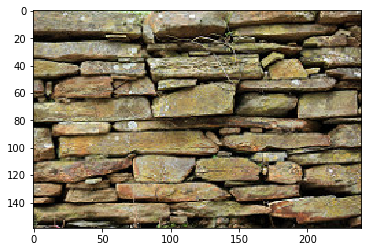

In [2]:
# Load the image
data = plt.imread('data/bricks.png')

# Display the image
plt.imshow(data)
plt.show()

### Images as data: changing images
To modify an image, you can modiy the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

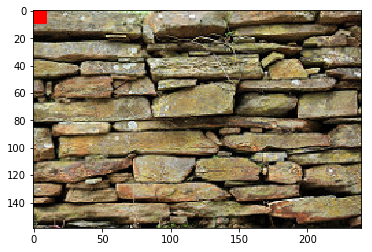

In [3]:
# Set the red channel in this part of the image to 1
data[0:10,0:10,0] = 1.

# Set the green channel in this part of the image to 0
data[0:10,0:10,1] = 0.

# Set the blue channel in this part of the image to 0
data[0:10,0:10,2] = 0.

# Visualize the result
plt.imshow(data)
plt.show()

### Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:
* Shirts
* Dresses
* Shoes

In [4]:
# labels to be enconded
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1
    
print(ohe_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Build a neural network

We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. 

For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

In [5]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### Compile a neural network
Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. 

Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list **['accuracy']** to the metrics keyword argument.

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting a neural network model to clothing data
Now fit the fully connected neural network that you constructed previously. 

The training data is provided as two variables: **train_data** that contains the pixel data for 50 images of the three clothing classes and **train_labels**, which contains one-hot encoded representations of the labels for each one of these 50 images. 

Transform the data into the network's expected input and then fit the model on training data and training labels.

```python
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)
```

To run the model on new data we can used:
```python
# Evaluate the model
model.evaluate(test_data, test_labels)
```

### One dimensional convolutions

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [7]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


### Image convolutions

The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

```python
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)
```

### Convolutional network for image classification

Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.

In [8]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(28, 28, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

### Training a CNN to classify clothing types

Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

```python
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)
```          

## Tweaking	the convolutions

* add zero padding
* add strides
* dilating - distance between subsequent pixels

With this the size of the output can change. To determine the size of the output use this formula:
$$ O = ((I − K + 2P )/S) + 1 $$

where:
* I	=	size	of	the	input
* K	=	size	of	the	kernel
* P 	=	size	of	the	zero	padding
* S	=	strides

### Add padding to a CNN

Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [9]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(28, 28, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Add strides to a convolutional network

The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [10]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(28, 28, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Creating a deep learning network

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

In [11]:
model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Train a deep CNN to classify clothing images

Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

```python
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)
```

### How many parameters in a deep CNN?

Keras can calculate the total number of parameters along with the number of parameters in each layer of the network.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_4 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


### Write your own pooling operation

As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.

```python
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])
```   

### Keras pooling layers

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

Convolution => Convolution => Flatten => Dense

However, you will also a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => Max pooling => Convolution => Flatten => Dense

In [13]:
from keras.layers import MaxPool2D
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_5 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


### Plot the learning curves

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

```python
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()
```

### Using stored weights to predict in a test set

Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. 

```python
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[0:3]) 
```

## Regularization

### Dropout

In each learning step:

* Select a subset of the	units
* Ignore it in the forward pass
* And in the back-propagation of error

### Batch	normalization
* Rescale the outputs

**Be careful when using them together! The disharmony between dropout and batch normalization.**

### Adding dropout to your network

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

* Convolution (15 units, kernel size 2, 'relu' activation)
* Dropout (20%)
* Convolution (5 units, kernel size 2, 'relu' activation)
* Flatten
* Dense (3 units, 'softmax' activation)

In [14]:
from keras.layers import Dropout
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add batch normalization to your network

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

1. Convolution (15 units, kernel size 2, 'relu' activation)
2. Batch normalization
3. Convolution (5 unites, kernel size 2, 'relu' activation)
4. Flatten
5. Dense (3 units, 'softmax' activation)

In [15]:
from keras.layers import BatchNormalization
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Interpreting the model

### Extracting a kernel from a trained network

One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

```python
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][:,:,0, 0]
print(kernel)
```

### Visualizing kernel responses

One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. 

```python
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()
```